In [1]:
import os
import glob
import numpy as np
import cv2
from tensorflow.compat.v1.keras import layers
from tensorflow.compat.v1 import keras 
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt
import csv
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
#load saved model
model = tf.keras.models.load_model('model/model.h5')
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
__________________

In [3]:
#load class file
import pandas as pd
df = pd.read_csv('model/classes.csv', header=None)  
classes = df.values[0]

print(classes[:5])
type(classes)

['lollipop' 'binoculars' 'garden' 'basket' 'penguin']


numpy.ndarray

In [7]:
#try to make prediction based on single data

data = np.load('data_single/apple.npy')
print('Original data shape: {0}'.format(data[0].shape))

# Reshape and normalize
data = data.reshape(data.shape[0], 28, 28, 1).astype('float32')
data /= 255.0

print('Reshaped data shape: {0}'.format(data[0].shape))

print('Converted format for prediction: {0}'.format(np.array([data[0]]).shape))

#try to do predict
result = model.predict(np.array([data[0]]))
print(result.shape)

print('Prediction result: {0}'.format(classes[np.argmax(result)]))

Original data shape: (784,)
Reshaped data shape: (28, 28, 1)
Converted format for prediction: (1, 28, 28, 1)
(1, 344)
Prediction result: baseball


uint8
(540, 540)


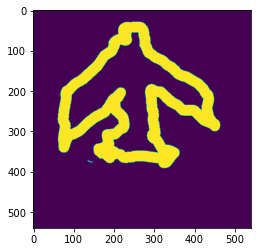

In [31]:
#try to process image for prediction
from matplotlib import image
from matplotlib import pyplot
# load image as pixel array
image = cv2.imread('airplane_g.png',cv2.IMREAD_GRAYSCALE)
# summarize shape of the pixel array
print(image.dtype)
print(image.shape)
# display the array of pixels as an image

pyplot.imshow(image)
pyplot.show()

In [43]:
def keras_process_image(img):
    image_x = 28
    image_y = 28
    img = cv2.resize(img, (image_x, image_y))
    img = cv2.GaussianBlur(img,(3,3),0)
    img = np.array(img, dtype=np.float32)
    img = np.reshape(img, (-1, image_x, image_y, 1))
    img /= 255.0
    return img

In [27]:
def keras_predict(model, image):
    processed = keras_process_image(image)
    print("processed: " + str(processed.shape))
    pred_probab = model.predict(processed)
    #pred_class_idx = list(pred_probab).index(max(pred_probab))
    predicted_class_name = classes[np.argmax(pred_probab)]
    print('Prediction result: {0}'.format(predicted_class_name))
    
    #np.argmax(result)
    
    return predicted_class_name

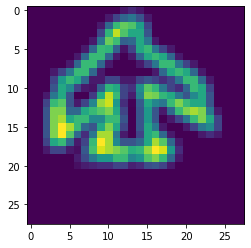

In [44]:
#check the processed image
processed_image = keras_process_image(image)

pyplot.imshow(processed_image[0])
pyplot.show()

In [48]:
print(processed_image.shape)

(1, 28, 28, 1)


In [46]:
keras_predict(model, image)

processed: (1, 28, 28, 1)
Prediction result: line


'line'